In [ ]:
!nvidia-smi

Mon Oct 31 13:55:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install --upgrade keras-cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394 kB 15.3 MB/s 


In [ ]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

1356917/1356917 [==============================] - 0s 0us/step
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
198180272/198180272 [==============================] - 3s 0us/step


In [ ]:
def plot_images(images):
  plt.figure(figsize=(20,20))
  for i in range(len(images)):
    ax = plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.tight_layout()

25/25 [==============================] - 79s 2s/step


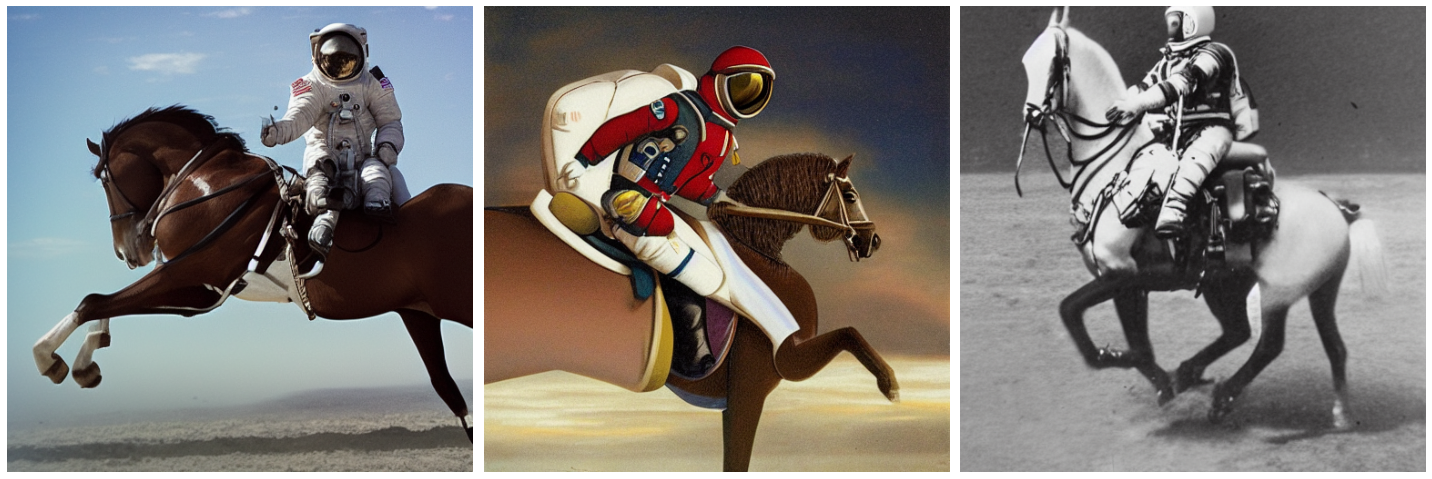

In [ ]:
images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=3)

plot_images(images)

In [ ]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


펭귄이 곰한테 뽀뽀하는 모습
The penguin kisses the bear.
25/25 [==============================] - 57s 2s/step


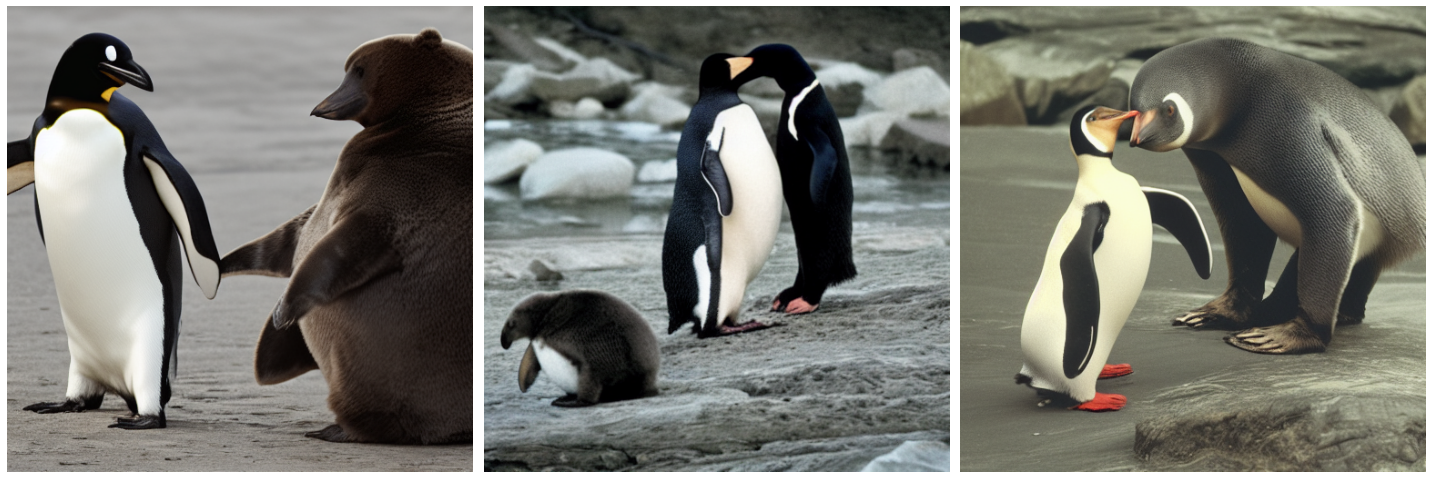

In [ ]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

def generate_images(text, n=3):
    print(text)
    translation = translator.translate(text)
    print(translation)

    images = model.text_to_image(translation, batch_size=n)

    return images

images = generate_images("펭귄이 곰한테 뽀뽀하는 모습")

plot_images(images)

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 11.6 MB 15.2 MB/s 
     |████████████████████████████████| 2.3 MB 46.7 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 106 kB 63.3 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 212 kB 67.5 MB/s 
     |████████████████████████████████| 272 kB 66.0 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 68 kB 6.9 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 856 kB 59.7 MB/s 
     |████████████████████████████████| 593 kB 67.8 MB/s 
     |████████████████████████████████| 4.0 MB 53.3 MB/s 


In [ ]:
import gradio as gr

def inference(text):
  image = generate_images(text, 1).squeeze()
  return image

demo = gr.Interface(fn=inference, inputs="text", outputs="image")
demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7d336098fd8241ed.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


원숭이가 사람의 흉내를 내는 것이 내 눈에는 참 밉다
I hate how monkeys imitate people.
25/25 [==============================] - 28s 1s/step
제 1의 아해가 무섭다고 그리오.
I can't believe I'm scared of the first child.
25/25 [==============================] - 28s 1s/step
제 2의 아해가 무섭다고 그리오.
I'm afraid of the Second Child.
25/25 [==============================] - 28s 1s/step
Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f860e908310>,
 'http://127.0.0.1:7860/',
 'https://7d336098fd8241ed.gradio.app')